In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
YP = pd.read_csv(r'/mnt/g/nelson_new/YP2.csv', header = 0, index_col=0)

In [6]:
YP

ANN9  nearest       dmp1     fgf23      sost    surface
ID                                                                
0      186.0730  24.4767  216.60000  27.27630  295.8040  205.39800
1      190.1930  24.4767  213.35900   3.83002  287.1020  189.95900
2      107.5210  12.8820    6.65099  14.89870  267.3940    5.07021
3      110.3220  13.8406   15.15180   5.82349  269.0710   12.18120
4      109.8470  12.8820   13.36100  10.19660  270.3830   13.18750
...         ...      ...        ...       ...       ...        ...
29947   41.0544  21.3637   31.02660   5.51524   65.7695    9.11475
29948   40.2224  29.6063   44.15850  29.08110   68.8125   -2.85685
29949   34.7048  21.3637   32.74240   1.23430   66.1577    6.61467
29950   42.4321  26.8884    9.67493  22.11930  102.9290    5.28183
29951   52.2369  38.6575   30.95640  19.35990  105.1970    9.33237

[29952 rows x 6 columns]

In [7]:
YP_subset = YP.sample(n = 2000)

In [54]:
YP_subset_original = YP.sample(n = 2000)

In [13]:
YP_subset_UMAP = YP_subset

In [8]:
YP_subset

ANN9   nearest      dmp1    fgf23      sost   surface
ID                                                             
9191   23.9756  11.35980  23.33060  25.5869  24.83540   0.11013
23726  50.8016  37.78100  20.22400  10.1767  71.61470  -7.02150
27975  26.9445  16.51360  19.26100  19.5385   6.69332 -33.93010
14742  32.3233  16.51570  12.06700  33.9185   1.39943 -30.64780
24086  44.1926  25.04420  28.16520   8.7273   6.41233 -22.14090
...        ...       ...       ...      ...       ...       ...
14473  28.5958  16.10750  14.29530  28.0713  22.72900 -11.76590
20823  29.5536  10.84190  41.07300  25.4799  26.35350 -48.56030
8924   34.2630  29.98350   8.21985  21.6858  32.82500 -50.50110
6703   31.4835   8.33786  13.56880  16.2646  13.35350 -15.19570
14131  37.4163  26.99430  28.76980  32.7865  55.95920   5.37184

[2000 rows x 6 columns]

In [9]:
from plotly.offline import init_notebook_mode, iplot

In [11]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np

In [12]:
corr = YP_subset.corr()
trace = go.Heatmap(z=corr,x=corr.index,y=corr.columns)
data = [trace]
layout = dict(title="Correlation Plot of Player Skills")
fig = dict(data=data, layout=layout)
iplot(fig)

In [14]:
from sklearn.decomposition import PCA
pca = PCA().fit(YP_subset)

In [16]:
pcaratio = pca.explained_variance_ratio_
trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
data = [trace]
layout = dict(title="YOPRO+ Dataset - PCA Explained Variance || 100% achieved at 5 components")
fig = dict(data=data, layout=layout)
iplot(fig)

In [17]:
pca = PCA(n_components=5)
skillsPCA = pca.fit_transform(YP_subset)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [22]:

X=YP_subset
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [27]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

In [28]:
dfskillsPCA

0          1          2          3          4  cluster
0     -2.997733 -15.769127  13.230214   2.998363 -10.633465        0
1     39.489427  -1.274079  -5.504023  -1.664873  28.289778        1
2    -31.008070   8.467535   1.980437   0.966665  -2.049997        4
3    -36.527831   1.354428   5.949908  14.972362   1.945293        0
4    -24.101097   2.736793  11.758074 -14.374203  14.295905        0
...         ...        ...        ...        ...        ...      ...
1995 -10.428033  -9.936588   4.939569   9.751331  -2.072700        0
1996 -12.985354  34.924708  10.105938   4.158576  -6.989327        4
1997 -14.131706  23.003561 -16.726596  13.563595  15.173171        4
1998 -19.796310  -9.163568   0.679894  -1.851472  -4.564985        0
1999  29.204460 -11.420249  16.486443  11.673168   8.164331        2

[2000 rows x 6 columns]

In [29]:
from sklearn.manifold import TSNE
X1 = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X1)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']

/home/mcrewcow/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/mcrewcow/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
skillsPCA_labels

array([0, 1, 4, ..., 4, 0, 2], dtype=int32)

In [34]:
YP_subset['cluster'] = skillsPCA_labels

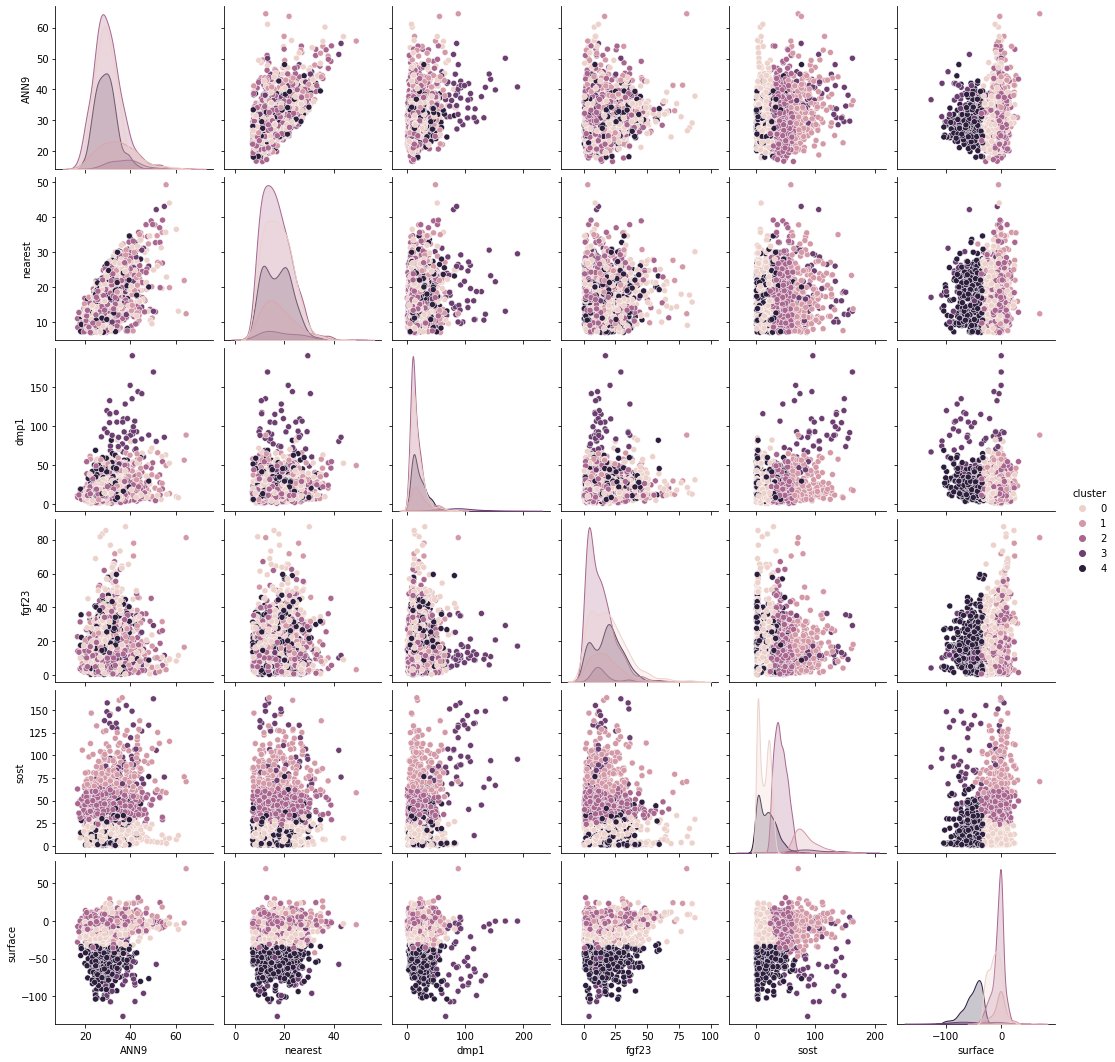

In [35]:
sns.pairplot(YP_subset, hue='cluster');

In [36]:
pca2 = PCA(n_components=2)
skillsPCA2 = pca2.fit_transform(YP_subset)
dfskillsPCA2 = pd.DataFrame(skillsPCA2)
dfskillsPCA2['cluster'] = skillsPCA_labels
dfskillsPCA2.columns = ['x1','x2','cluster']

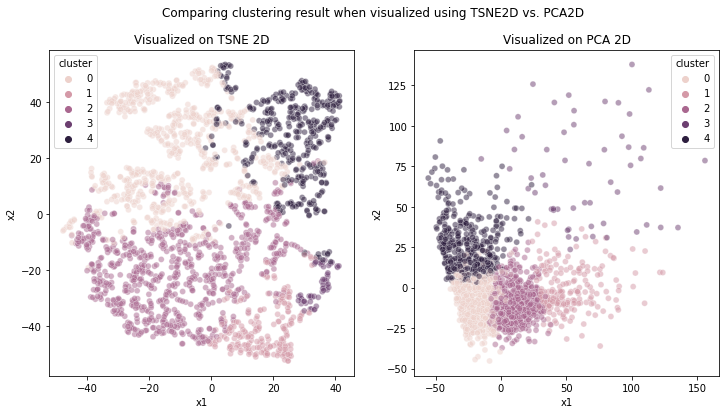

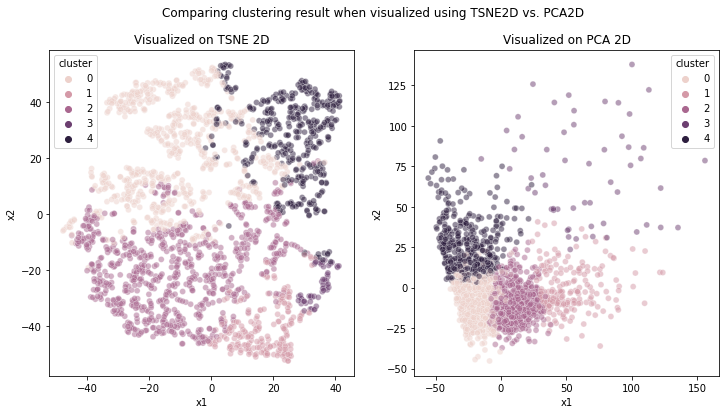

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [38]:
import umap

In [39]:
reducer = umap.UMAP()

In [40]:
YP_subset_UMAP

ANN9   nearest      dmp1    fgf23      sost   surface  cluster
ID                                                                      
9191   23.9756  11.35980  23.33060  25.5869  24.83540   0.11013        0
23726  50.8016  37.78100  20.22400  10.1767  71.61470  -7.02150        1
27975  26.9445  16.51360  19.26100  19.5385   6.69332 -33.93010        4
14742  32.3233  16.51570  12.06700  33.9185   1.39943 -30.64780        0
24086  44.1926  25.04420  28.16520   8.7273   6.41233 -22.14090        0
...        ...       ...       ...      ...       ...       ...      ...
14473  28.5958  16.10750  14.29530  28.0713  22.72900 -11.76590        0
20823  29.5536  10.84190  41.07300  25.4799  26.35350 -48.56030        4
8924   34.2630  29.98350   8.21985  21.6858  32.82500 -50.50110        4
6703   31.4835   8.33786  13.56880  16.2646  13.35350 -15.19570        0
14131  37.4163  26.99430  28.76980  32.7865  55.95920   5.37184        2

[2000 rows x 7 columns]

In [42]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [43]:
data = YP_subset_UMAP[
    [
        "ANN9",
        "dmp1",
        "fgf23",
        "sost",
        'nearest',
        'surface'
    ] 
].values
scaled_data = StandardScaler().fit_transform(data)

In [44]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(2000, 2)

In [45]:
embedding

array([[5.933091 , 6.0527763],
       [0.7258944, 7.7584925],
       [3.8138328, 2.9504848],
       ...,
       [2.8375647, 2.5602198],
       [6.692968 , 5.0087104],
       [1.3139753, 6.6153574]], dtype=float32)

In [46]:
embedding = pd.DataFrame(embedding)
embedding['cluster'] = skillsPCA_labels

In [47]:
embedding

0         1  cluster
0     5.933091  6.052776        0
1     0.725894  7.758492        1
2     3.813833  2.950485        4
3     2.012711  3.230051        0
4     1.648202  8.000422        0
...        ...       ...      ...
1995  2.622153  4.853266        0
1996  4.687401  1.288915        4
1997  2.837565  2.560220        4
1998  6.692968  5.008710        0
1999  1.313975  6.615357        2

[2000 rows x 3 columns]

In [48]:
embedding.columns = ['x1','x2','cluster']

In [49]:
embedding

x1        x2  cluster
0     5.933091  6.052776        0
1     0.725894  7.758492        1
2     3.813833  2.950485        4
3     2.012711  3.230051        0
4     1.648202  8.000422        0
...        ...       ...      ...
1995  2.622153  4.853266        0
1996  4.687401  1.288915        4
1997  2.837565  2.560220        4
1998  6.692968  5.008710        0
1999  1.313975  6.615357        2

[2000 rows x 3 columns]

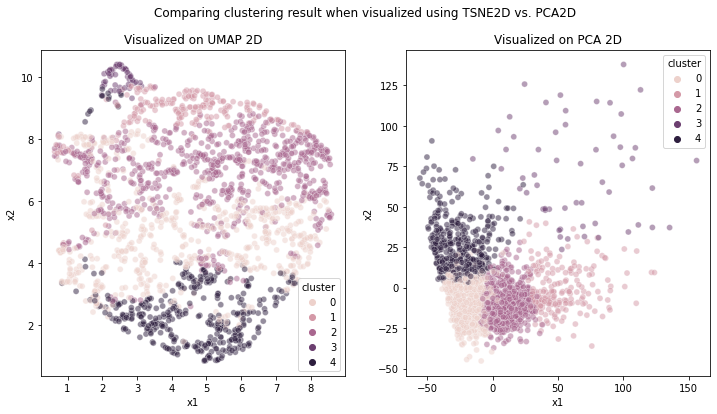

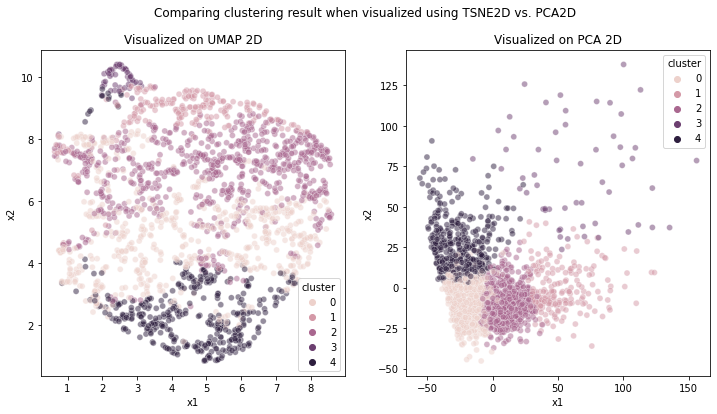

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=embedding,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on UMAP 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [55]:
YP_subset_original

ANN9   nearest      dmp1     fgf23     sost    surface
ID                                                              
22930  36.3950  20.22860  21.15590   9.77369  31.2650   0.005289
6865   32.1217  10.74650  27.21890  11.45550  34.4730  -7.623030
9905   28.5827  11.97820  14.82360  21.69390  22.9755  -7.842810
28125  29.5540   7.43961  12.82500  13.20710  75.0675   5.387680
1751   32.2764  25.14560  11.29430  28.32620  27.4727 -37.892300
...        ...       ...       ...       ...      ...        ...
15072  39.0315  25.06900  11.44390  20.19940  19.0005 -19.863100
13492  39.6214  25.91060   3.96847   1.09604  46.5801   0.594054
27797  28.7494  14.03940  18.09390  22.78280  20.3461 -12.681900
24627  31.0812  13.91170   6.67811  26.03100  27.9784 -12.837500
22368  24.7503   9.55229  36.13250  14.12220  40.7427 -60.875400

[2000 rows x 6 columns]

In [59]:
import plotly.express as px

In [61]:
fig2 = px.scatter_3d(YP_subset_original, x="dmp1", y="fgf23",z="sost",
                     color="ANN9")
fig2.update_layout(title="4 Features Representation")
fig2.show()

In [62]:
dftsne

x1         x2  cluster
0    -27.238991   2.953608        0
1      6.166610 -49.825218        1
2      8.384926  33.832626        4
3      1.889548  36.594845        0
4      5.040195  17.782284        0
...         ...        ...      ...
1995 -17.231783   2.475486        0
1996  28.596998  31.540354        4
1997  33.703918  23.703413        4
1998 -23.801331  16.108423        0
1999   7.287503 -28.497066        2

[2000 rows x 3 columns]

In [63]:
YP_subset_UMAP

ANN9   nearest      dmp1    fgf23      sost   surface  cluster
ID                                                                      
9191   23.9756  11.35980  23.33060  25.5869  24.83540   0.11013        0
23726  50.8016  37.78100  20.22400  10.1767  71.61470  -7.02150        1
27975  26.9445  16.51360  19.26100  19.5385   6.69332 -33.93010        4
14742  32.3233  16.51570  12.06700  33.9185   1.39943 -30.64780        0
24086  44.1926  25.04420  28.16520   8.7273   6.41233 -22.14090        0
...        ...       ...       ...      ...       ...       ...      ...
14473  28.5958  16.10750  14.29530  28.0713  22.72900 -11.76590        0
20823  29.5536  10.84190  41.07300  25.4799  26.35350 -48.56030        4
8924   34.2630  29.98350   8.21985  21.6858  32.82500 -50.50110        4
6703   31.4835   8.33786  13.56880  16.2646  13.35350 -15.19570        0
14131  37.4163  26.99430  28.76980  32.7865  55.95920   5.37184        2

[2000 rows x 7 columns]

In [64]:
avgs_raw = YP_subset_UMAP

In [65]:
avgs_raw = avgs_raw.groupby('cluster').mean()

In [66]:
avgs_raw['surface'] = avgs_raw['surface'].abs()

In [72]:
cols = list(avgs_raw.columns.values)
cols

['ANN9', 'nearest', 'dmp1', 'fgf23', 'sost', 'surface']

In [73]:
avgs_raw_new = avgs_raw.reindex(columns=['ANN9', 'nearest', 'surface', 'dmp1', 'fgf23', 'sost'])

<AxesSubplot:xlabel='cluster'>

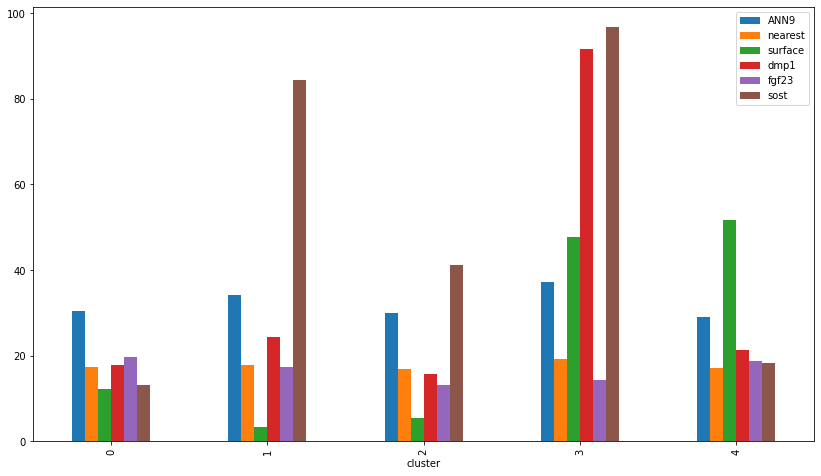

In [74]:
avgs_raw_new.plot.bar(figsize = (14,8))

In [68]:
YP_subset_UMAP.cluster.value_counts()

2    740
0    617
4    385
1    203
3     55
Name: cluster, dtype: int64